# **Getting Started**

Our dataset comes from [Kaggle](https://www.kaggle.com/datasets/ziya07/plant-health-data/data).  
The data consists of readings from various IoT sensors measuring key features such as:

- Timestamp: The date and time of each biosensor reading.
  
- Plant_ID: Unique identifier for each plant in the dataset.
  
- Soil_Moisture (%): Measures the water content in soil, crucial for maintaining adequate hydration levels.

- Ambient_Temperature (°C): Ambient temperature around the plant.

- Soil_Temperature (°C): Soil temperature near plant roots.

- Humidity (%): Air humidity level, which affects plant transpiration and growth.

- Light_Intensity (Lux): Measures light exposure, essential for photosynthesis.

- Soil_pH: Indicates the acidity or alkalinity of the soil, affecting nutrient availability.

- Nitrogen_Level (mg/kg): Key nutrient supporting plant growth and leaf development.

- Phosphorus_Level (mg/kg): Nutrient important for root and flower development.

- Potassium_Level (mg/kg): Nutrient aiding in overall plant resilience and disease resistance.

- Chlorophyll_Content (mg/m²): Chlorophyll concentration reflects photosynthetic activity and plant health.

- Electrochemical_Signal (mV): Represents stress signals detected in plants, often due to environmental changes or internal stress responses.

First 5 rows:
                     Timestamp  Plant_ID  Soil_Moisture  Ambient_Temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   Soil_Temperature   Humidity  Light_Intensity   Soil_pH  Nitrogen_Level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   Phosphorus_Level  Potassium_Level  Chlorophy

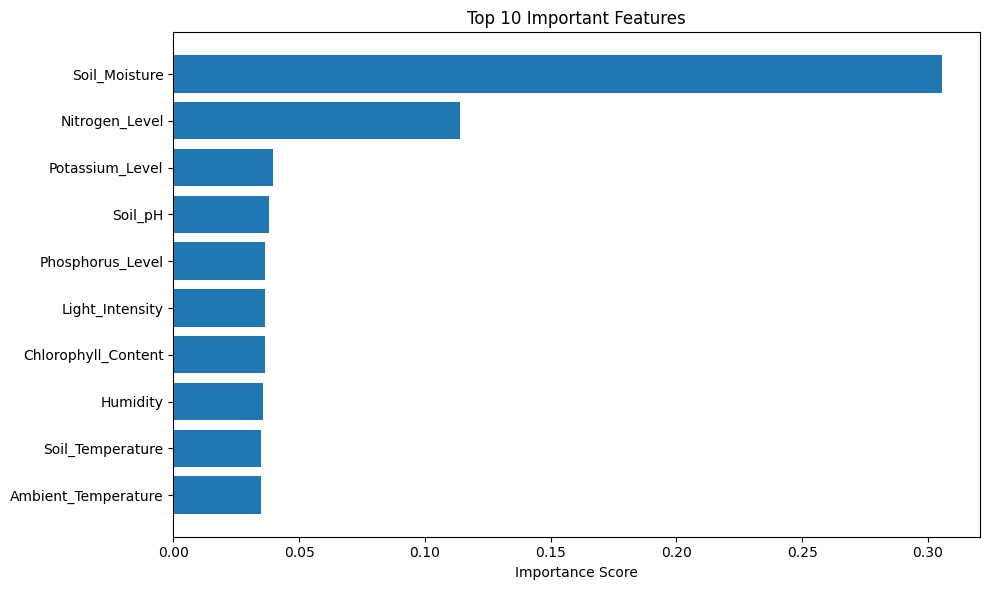

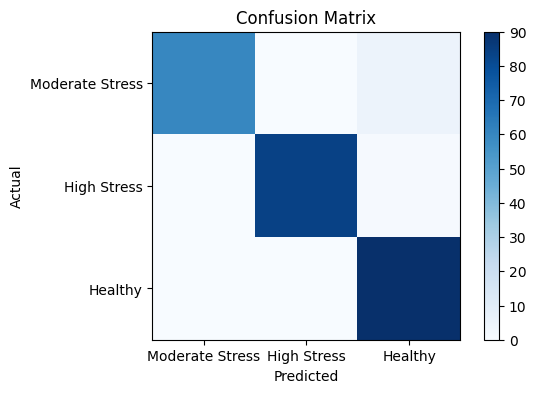

'\nwith open("/mnt/data/plant_health_model.pkl", "wb") as f:\n    pickle.dump(model, f)\n\nwith open("/mnt/data/plant_health_encoder.pkl", "wb") as f:\n    pickle.dump(encoder, f)\n\nwith open("/mnt/data/plant_health_scaler.pkl", "wb") as f:\n    pickle.dump(scaler, f)\n'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#Load the Dataset
df = pd.read_csv("plant_health_data.csv")

#Initial Exploration
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

#Dropping Unnecessary Columns
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

#Handle Missing Values
df.dropna(inplace=True)

#Separate Features and Target
target_col = 'Plant_Health_Status'  # <- Update if needed
X = df.drop(target_col, axis=1)
y = df[target_col]

#Encode Categorical Features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X_encoded.index = X.index

#Combine with numerical features
X_non_cat = X.drop(columns=categorical_cols)
X_final = pd.concat([X_encoded, X_non_cat], axis=1)

#Normalize Numerical Features
scaler = StandardScaler()
X_final[X_non_cat.columns] = scaler.fit_transform(X_final[X_non_cat.columns])

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42)

#Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluate the Model
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X_final.columns)
top_features = importances.sort_values(ascending=False).head(10)

#Showcase Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features.values)
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks(np.arange(len(set(y))), labels=set(y))
plt.yticks(np.arange(len(set(y))), labels=set(y))
plt.show()

#Save Artifacts
'''
with open("/mnt/data/plant_health_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("/mnt/data/plant_health_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

with open("/mnt/data/plant_health_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
'''

#print("\nModel, encoder, and scaler saved successfully")
